##### Data: tips, flights, drinksbycountry, uforeports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Seaborn

## O que é?

Novamente, é difícil competir com a definição no site oficial https://seaborn.pydata.org/

É uma biblioteca de alto nível que funciona em cima do matplotlib. Uma interface de alto nível, que permite que façamos plots complexos e bonitos em apenas uma linha.


#### Lembrem-se que para cada plot aqui você mesmo pode experimentar utilizando SHIFT + TAB e verificando que tipos de alteração você pode fazer. Além de poder explorar a documentação do Matplotlib e do Seaborn.

# Distribution Plots (distplot, jointplot, pairplot, kdeplot)

In [6]:
#O seaborn também possui datasets. Para mais informações, usar o SHIFT+TAB no método load_dataset
tips = sns.load_dataset('tips')

Vamos chamar algumas funções úteis em cima desses dataframes.

In [7]:
#tips é um dataframe
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


O método **info** nos dá mais informações do dataset, como: uma ideia dos valores nulos, os tipos de dados, número de linhas e colunas, etc.

**O dataset tips** é um dataset de um restaurante, contendo dados de cada pessoa que foi ao restaurante. Incluindo a gorjeta e a conta que pagaram (esse vai ser o nosso foco agora)

In [4]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


**describe** é outro método útil, que nos dá a contagem, a média, o desvio padrões e os quartis de cada coluna numérica do dataframe.

In [5]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


## distplot

Distplot é o primeiro plot que veremos do tipo que não lida com variáveis categóricas.

Basta passarmos um Pandas Series como argumento, na sua forma mais simples. Lembre-se que uma coluna é uma Pandas Series. Lembre-se também que isso só faz sentido para dados numéricos.

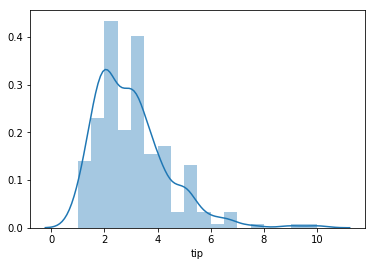

In [26]:
#Forma mais simples de chamar.
sns.distplot(tips['tip'])

Podemos ver com o plot acima que as gorjetas aparentemente estão mais concentradas entre 2 e 3,5 dólares (apenas observando por cima).

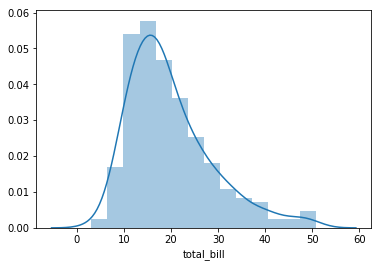

In [15]:
#Outro caso
sns.distplot(tips['total_bill'])

Aqui vemos que a conta ficou em torno de 18 dólares (apenas observando por cima). 

**NÓS VEREMOS MAIS NA FRENTE COMO OBSERVAR MELHOR ESSE TIPO DE GŔAFICO.**

Ok, essa curva que vemos no nosso gráfico é chamada de KDE (Kernel Density Estimation), é algo que parece complexo mas é bem simples. Eu expliquei da melhor maneira possível em sala de aula, mas se algo não ficou claro, a página do Wikipedia é decente.

Em português:
    https://pt.wikipedia.org/wiki/Estimativa_de_densidade_kernel
    
Em inglês:
    https://en.wikipedia.org/wiki/Kernel_density_estimation
    

**A versão em inglês está mais completa e possui um gráfico muito esclarecedor na seção "Example". É como se a curva KDE fosse a soma de todas aquelas distribuições normais centradas nos valores da lista (as curvas tracejadas e vermelhas)**

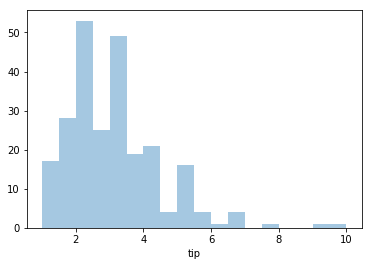

In [27]:
#É tão fácil assim para tirar a curva KDE do nosso gráfico e ficar apenas com os histogramas.
sns.distplot(tips['tip'],kde=False)

Estamos lidando com um número bem baixo de dados e o Pandas automaticamente tenta encontrar para nós o melhor número de **bins**(barras) para o nosso distplot. Porém também podemos especificar!

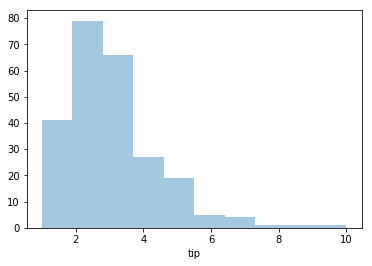

In [28]:
sns.distplot(tips['tip'],bins=10, kde=False)

## jointplot

Jointplot é como se fosse um scatterplot(gráfico de dispersão) que nos mostra a distribuição nos eixos X e Y, também.

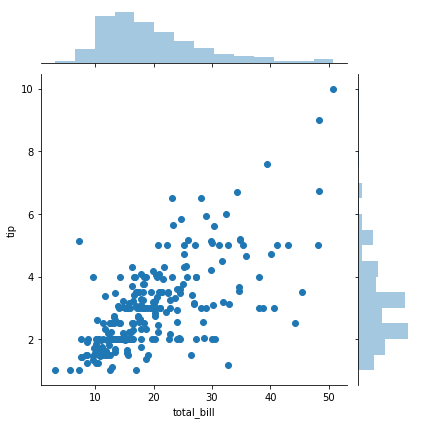

In [29]:
sns.jointplot(x='total_bill',y='tip',data=tips)

Note como foi diferente usar essa função. Ela pede o eixo X, eixo Y e de onde estamos tirando esses eixos (parâmetro data).

Vamos explorar o parâmetro "**kind**"

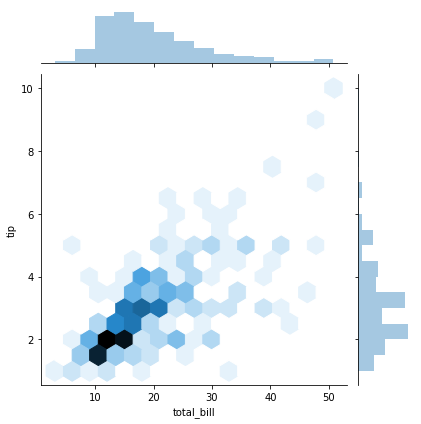

In [30]:
sns.jointplot(x='total_bill',y='tip',data=tips, kind='hex')

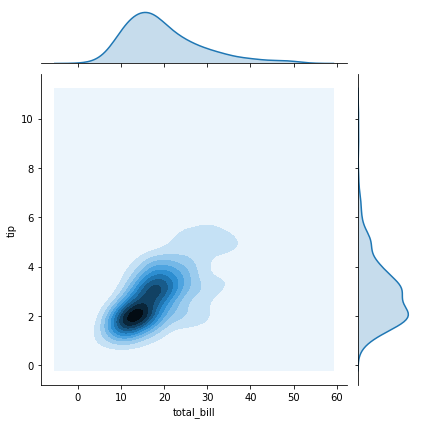

In [34]:
sns.jointplot(x='total_bill',y='tip',data=tips, kind='kde')

Esses são os valores que eu mais gosto de passar pro **kind**, mas vocês podem explorar outras possibilidades também.

## pairplot

O pairplot pega toda coluna numérica do nosso dataframe e relaciona cada um deles. Mostrando um histograma quando o eixo X e Y são iguais e um gráfico de dispersão quando diferentes.


pairplot é um plot que muitas vezes é "inútil". Muitas vezes ele não nos mostra nenhuma informação relevante, além de não ser bom de utilizar quando tivermos muitas colunas numéricas (porque demoraria muito para processar, além de ficarmos com um plot gigantesco).


**Note que o pairplot opera num dataframe inteiro. É por isso que vamos passar o dataframe inteiro para a função pairplot.**

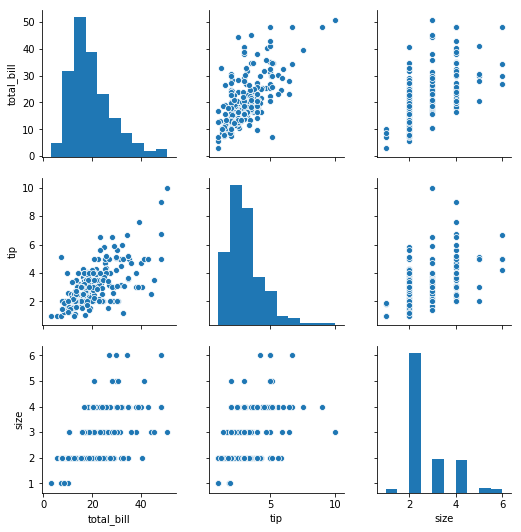

In [36]:
sns.pairplot(tips)
#Um simples pairplot

Nós revisitaremos esse plot mais na frente para brincar com seus argumentos.

## rugplot

Ok, esse plot é realmente semi-inútil. Coloquei ele aqui para que vocês possam relacionar com o que viram quando foram estudar a curva KDE.

O **rugplot** apenas adiciona um "tick" a cada ocorrência do valor. É um início de estudo em cima da distribuição.

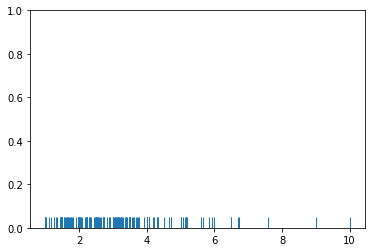

In [37]:
sns.rugplot(tips['tip'])

## kdeplot

Nós vimos o distplot, que já nos dá um histograma e a curva KDE.

Nós podemos utilizar a mesma função para nos dar apenas o KDE, mexendo com o parâmetro **hist**.

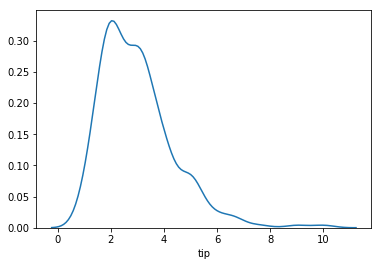

In [39]:
sns.distplot(tips['tip'],hist=False)

Porém, o Seaborn possui uma função isolada para o KDE, por ser algo mais complexo.

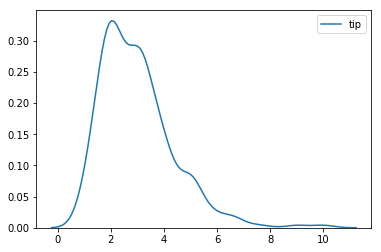

In [40]:
sns.kdeplot(tips['tip'])

Note como os dois plots acima são equivalentes e como eles se relacionam com o **rugplot** que fizemos antes disso.

O método **kdeplot** realmente nos dá mais liberdade para brincarmos com o KDE. Vou demonstrar aqui, mas não é necessário que vocês compreendam.

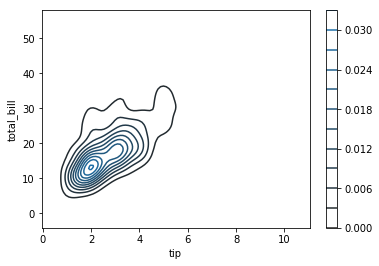

In [46]:
sns.kdeplot(tips['tip'],tips['total_bill'],kernel='cos',bw='silverman',cbar=True)

# Categorical Plots (barplot, countplot, boxplot, violinplot)

Ok, dessa vez vamos levar as variáveis categóricas em consideração. **Geralmente** colocamos no eixo X as variáveis categóricas e no eixo Y as numéricas. Mas isso não importa muito.

A forma de chamarmos esses métodos, em geral, será parecida com a forma que usamos para chamar o jointplot.

## barplot

Esse é o plot em barra que vocês já viram muitas vezes.

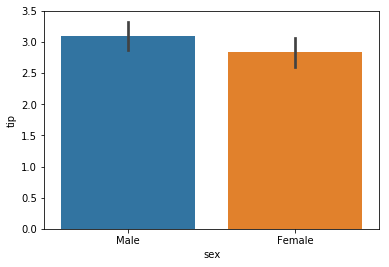

In [48]:
#Note que, igual ao jointplot, mandamos o X e o Y. Daí, dizemos de onde esses valores vêm.
sns.barplot(x='sex',y='tip',data=tips)

Nesse gráfico, estamos vendo a média de gorjeta deixada por homens e mulheres no restaurante.

Um dos parâmetros importantes do barplot é o parâmetro **estimator**. O estimator é a função utilizada para o cálculo da barra. **Por padrão, é calculada a média.**

Vamos calcular o desvio padrão (std)

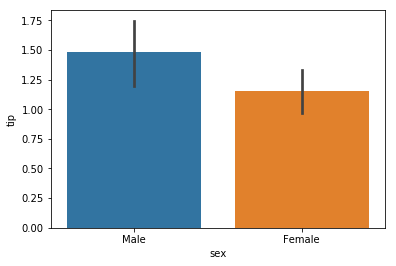

In [50]:
sns.barplot(x='sex',y='tip',data=tips, estimator=np.std) #função de desvio padrão do numpy

Agora vemos o desvio padrão da gorjeta por sexo ao invés da média.

**Vamos agora inverter o X e o Y só para mostrar pra vocês que não existe tanta diferença.** Às vezes até pode ser melhor inverter.

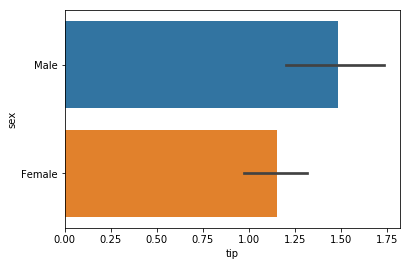

In [51]:
sns.barplot(x='tip',y='sex',data=tips, estimator=np.std)

**O mais importante é que uma das variáveis seja categórica e outra seja numérica.** Se não, acabaremos com algo assim:

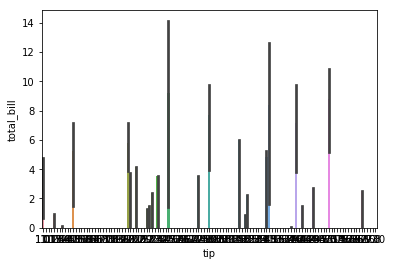

In [52]:
sns.barplot(x='tip',y='total_bill',data=tips, estimator=np.std)

No caso de duas variáveis categóricas, o próprio Seaborn reclama. No caso de ambas serem numéricas, não há reclamação. O motivo de não haver reclamação é que pode haver variáveis que sejam numéricas mas possam ser interpretadas como categóricas.

Um exemplo disso é a coluna **size**

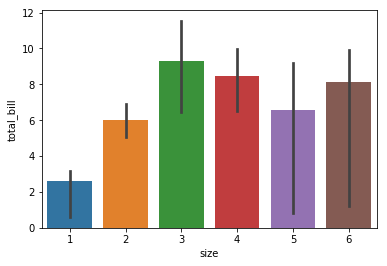

In [54]:
sns.barplot(x='size',y='total_bill',data=tips, estimator=np.std)

## countplot

O countplot é um barplot, mas especificamente para fazer contagem.

Por fazer contagem, é necessário apenas passar um argumento, que é categórico.

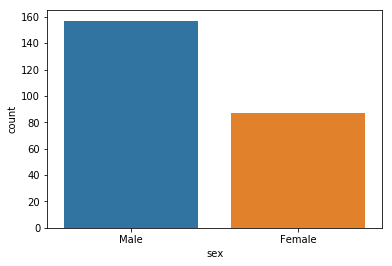

In [57]:
sns.countplot(x='sex',data=tips)

Podemos ver que temos mais homens do que mulheres no dataset. Para invertermos, só passarmos o y ao invés do x.


O que não podemos fazer é passar ambos x e y.

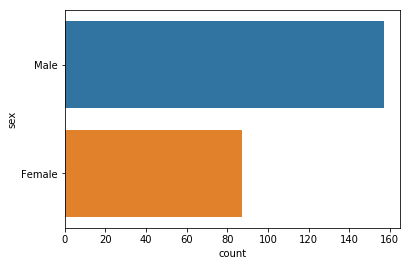

In [63]:
sns.countplot(y='sex',data=tips)

## boxplot

O boxplot já é bem conhecido. Explicar a vocês claramente por aqui seria complicado. Mas basicamente dividimos nossos dados em quartis (25%) e denominamos uma upper fence e lower fence para mostrar outliers.

https://pt.wikipedia.org/wiki/Diagrama_de_caixa

https://en.wikipedia.org/wiki/Interquartile_range

**Descrição:**

1. O boxplot já traz uma ideia de distribuição com ele. 50% dos dados estão na "caixa" colorida.
2. Os pontos de forma de losango são denominados outliers (são mais/menos que a upper/lower fence)
3. A linha dentro da "caixa colorida" denomina a mediana, ou o segundo quartil.

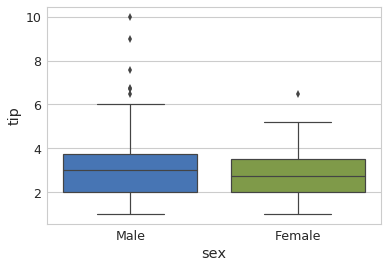

In [33]:
sns.boxplot(x='sex',y='tip',data=tips)

Esse boxplot nos mostra que as distribuições das gorjetas de homens e mulheres são bem similares, porém alguns homens pagaram bem mais do que a média (não fizemos o cálculo da média, mas dá pra enxergar os outliers e ver que a upper fence do homem fica um pouco acima da mulher).

#### Vamos agora introduzir o parâmetro "hue", um dos mais úteis e que vale para quase todos os plots.

O parâmetro "hue" é uma forma de pegar ainda mais informação do nosso plot, adicionando outra variável categórica.

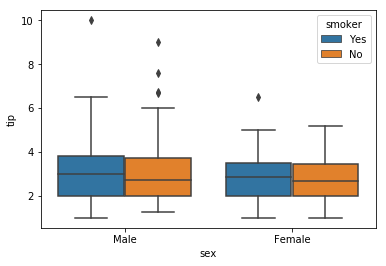

In [64]:
sns.boxplot(x='sex',y='tip',data=tips,hue='smoker')

Agora podemos ver também não só em função de homens e mulheres, mas também em função de fumantes e não fumantes.

## Violinplot

O boxplot é maravilhoso e é bem conhecido. Porém, o **Violinplot** é o meu favorito definitivamente.

Antes de partir direto para o Violinplot, vamos construí-lo devagar.

Vamos partir de um tipo de plot chamado **stripplot**, que tenta usar pontos para tentar mostrar uma distribuição dos dados.

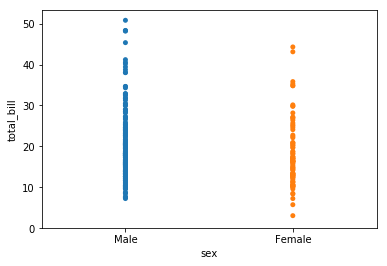

In [66]:
#Pedagogicamente, ignorem o  "jitter=False"
sns.stripplot(x='sex',y='total_bill',data=tips,jitter=False)

Ok, no máximo nós podemos dizer que não tem muita gente pagando mais do que 40 dólares no total de sua conta(note que trocamos para total_bill). Isso não é muito útil.

E é por isso que tiveram a ideia de adicionar um "ruído" ao stripplot, para separar mais os pontos (todos estão atrás um do outro) e dar uma melhor ideia.

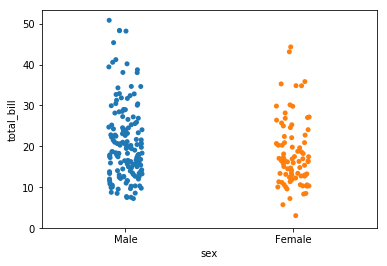

In [67]:
sns.stripplot(x='sex',y='total_bill',data=tips,jitter=True)
#Não precisava colocar jitter=True, esse já é o padrão, mas quis deixar claro que agora jitter=True.
#Não era muito bom pedagogicamente mostrar o gráfico já com a "solução".

Ok, agora já temos uma ideia um pouco melhor. Aparentemente as mulheres estão pagando mais entre 10 e 20 dólares. Enquanto que os homens...não dá para dizer direito. **Existem alguns pontos fazendo "overlap"**(um em cima do outro) no caso do homem (também há alguns no caso da mulher, mas aparentemente no homem existem mais, o que faz sentido já que vimos anteriormente que há mais homens do que mulheres na base de dados).

Talvez a única coisa que dê para dizer a respeito do homem é que aparentemente há uma maior parte deles que paga de 10 a 25 dólares (chute)

Com isso, vamos agora para a ideia do **swarmplot**, que tenta resolver esse problema dos pontos fazendo **overlap** de uma vez por todas, colocando os pontos similares um ao lado do outro.

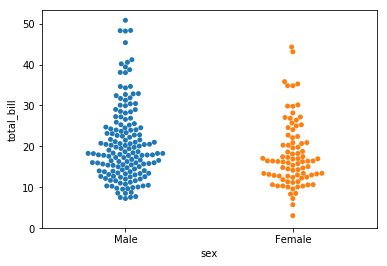

In [68]:
sns.swarmplot(x='sex',y='total_bill',data=tips)

Isso já é bem melhor, já meio que conseguimos ver um KDE espelhado no eixo Y (não se preocupem se não entenderam isso).

Porém ainda existem problemas. Além de não ser muito bonito, imagine se tivéssemos 100 homens que pagaram em torno de 20 dólares. Nós veríamos 100 pontos um ao lado do outro no gráfico, e talvez até esses pontos invadissem o espaço dos pontos das mulheres.

Ao observar a formação de um aparente KDE, gênios tiveram uma ideia para desenvolver o nosso querido **violinplot**.

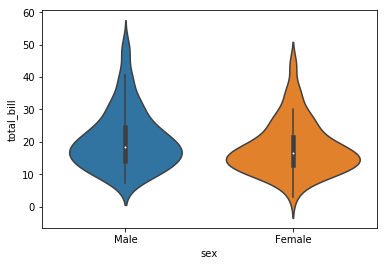

In [70]:
sns.violinplot(x='sex',y='total_bill',data=tips)

Ok, existe muita coisa acontecendo aí. Primeiro gostaria que vocês tentassem ver que cada "violino" é um KDE espelhado (notem que o lado esquerdo de cada violino é igual ao direito e que é nada mais que uma curva KDE).

Notem também que no interior de cada violino existe um boxplot escondido. Notem a "caixa" colorida de preto e o ponto branco (a mediana ou segundo quartil).


#### Porém,

Não há nada de errado com o violinplot que fizemos. Mas de certa forma ele é redundante (não que seja inútil, muitas vezes o violinplot acima é o que realmente queremos no nosso caso de uso). Se temos um KDE espelhado, por que não colocar mais uma variável categórica e aproveitar esse espaço "desperdiçado"?

Vamos ver o que estou querendo dizer com o parâmetro **hue** e o parâmetro **split**.

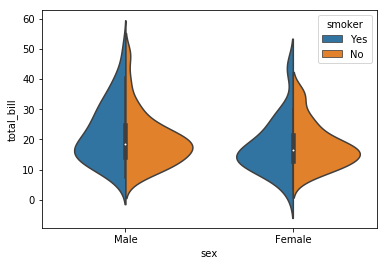

In [71]:
sns.violinplot(x='sex',y='total_bill',hue='smoker',split=True,data=tips)

Notem agora o que está acontecendo. Nós temos 2 variáveis categóricas e uma numérica. Vemos a distribuição de cada caso (fumante e homem, fumante e mulher, não-fumante e homem, não-fumante e mulher) junto com o mini-boxplot.

Isso é uma quantidade absurda de informação num só plot. **E é uma forma elengate**.

Nós na verdade fizemos a mesma coisa antes com o boxplot (mas com as gorjetas), notem a diferença:

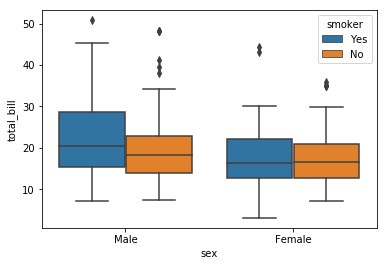

In [73]:
#sns.boxplot(x='sex',y='tip',data=tips,hue='smoker') #esse foi o que fizemos antes
sns.boxplot(x='sex',y='total_bill',data=tips,hue='smoker') #boxplot equivalente ao nosso violinplot final

### Em suma

Violinplots são muito bons, contém muita informação. **Porém**, são mais complicados de analisar, principalmente para executivos (e até mesmo outros cientistas de dados) que nunca ouviram falar no violinplot. O boxplot ainda é o mais conhecido.

Um não exclui o outro. Para alguns casos, é melhor usarmos boxplots, para outros, é melhor o violinplot. **Mas, sempre pense em quem vai ver o seu plot. Se for alguém que o conhecimento não passa de gráficos de pizza / histogramas / diagramas de caixa(boxplots), não adianta querer mostrar um violin plot**.


## Colocando o violinplot junto com o swarmplot, para melhor entendimento:

O seaborn nos deixa às vezes plotar um plot em cima de outro.

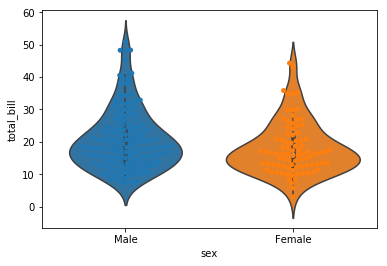

In [76]:
sns.violinplot(x='sex',y='total_bill',data=tips)
sns.swarmplot(x='sex',y='total_bill',data=tips)

Porém, fica difícil de ver já que estão com a mesma cor. Vamos especificar a cor do swarmplot.

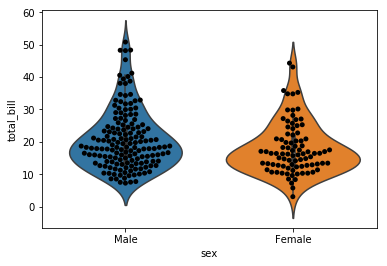

In [79]:
sns.violinplot(x='sex',y='total_bill',data=tips)
sns.swarmplot(x='sex',y='total_bill',data=tips, color='black')

Assim, conseguimos ver a relação do swarmplot com o violinplot ainda mais claramente.

# Esse notebook já está muito cheio de informação. No próximo, vamos estudar Matrix Plots e Grids. Depois, estudaremos como customizar os nossos plots como verdadeiros profissionais com o nosso conhecimento prévio de matplotlib.

## Grids (Pairplot vs PairGrid vs FacetGrid) (iris, g = PairGrid, g.map, g = FacetGrid, g.map(plt.scatter,x,y) )

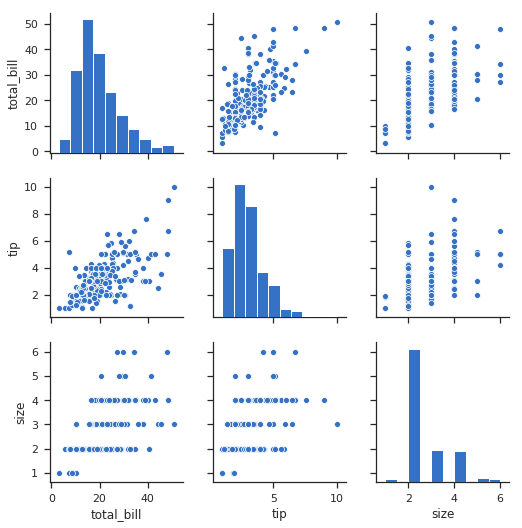

In [90]:
sns.pairplot(tips)

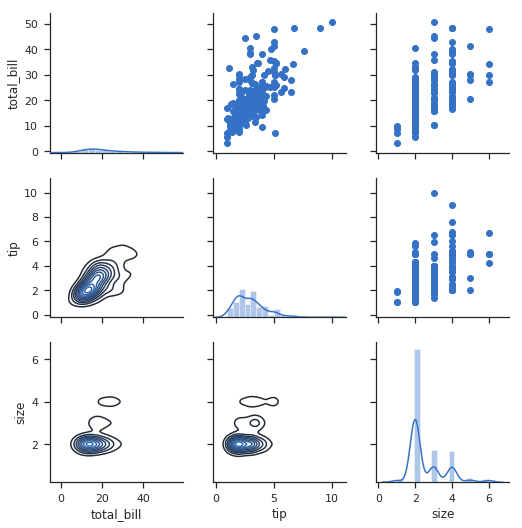

In [95]:
g = sns.PairGrid(tips)
#g.map(plt.scatter)
g.map_upper(plt.scatter)
g.map_diag(sns.distplot)
g.map_lower(sns.kdeplot)

/home/fernando/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


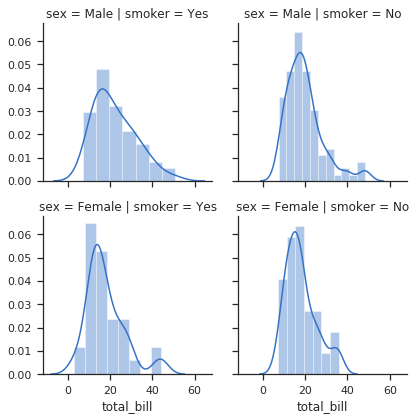

In [102]:
g = sns.FacetGrid(tips,row='sex',col='smoker')
g.map(sns.distplot,'total_bill')

/home/fernando/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


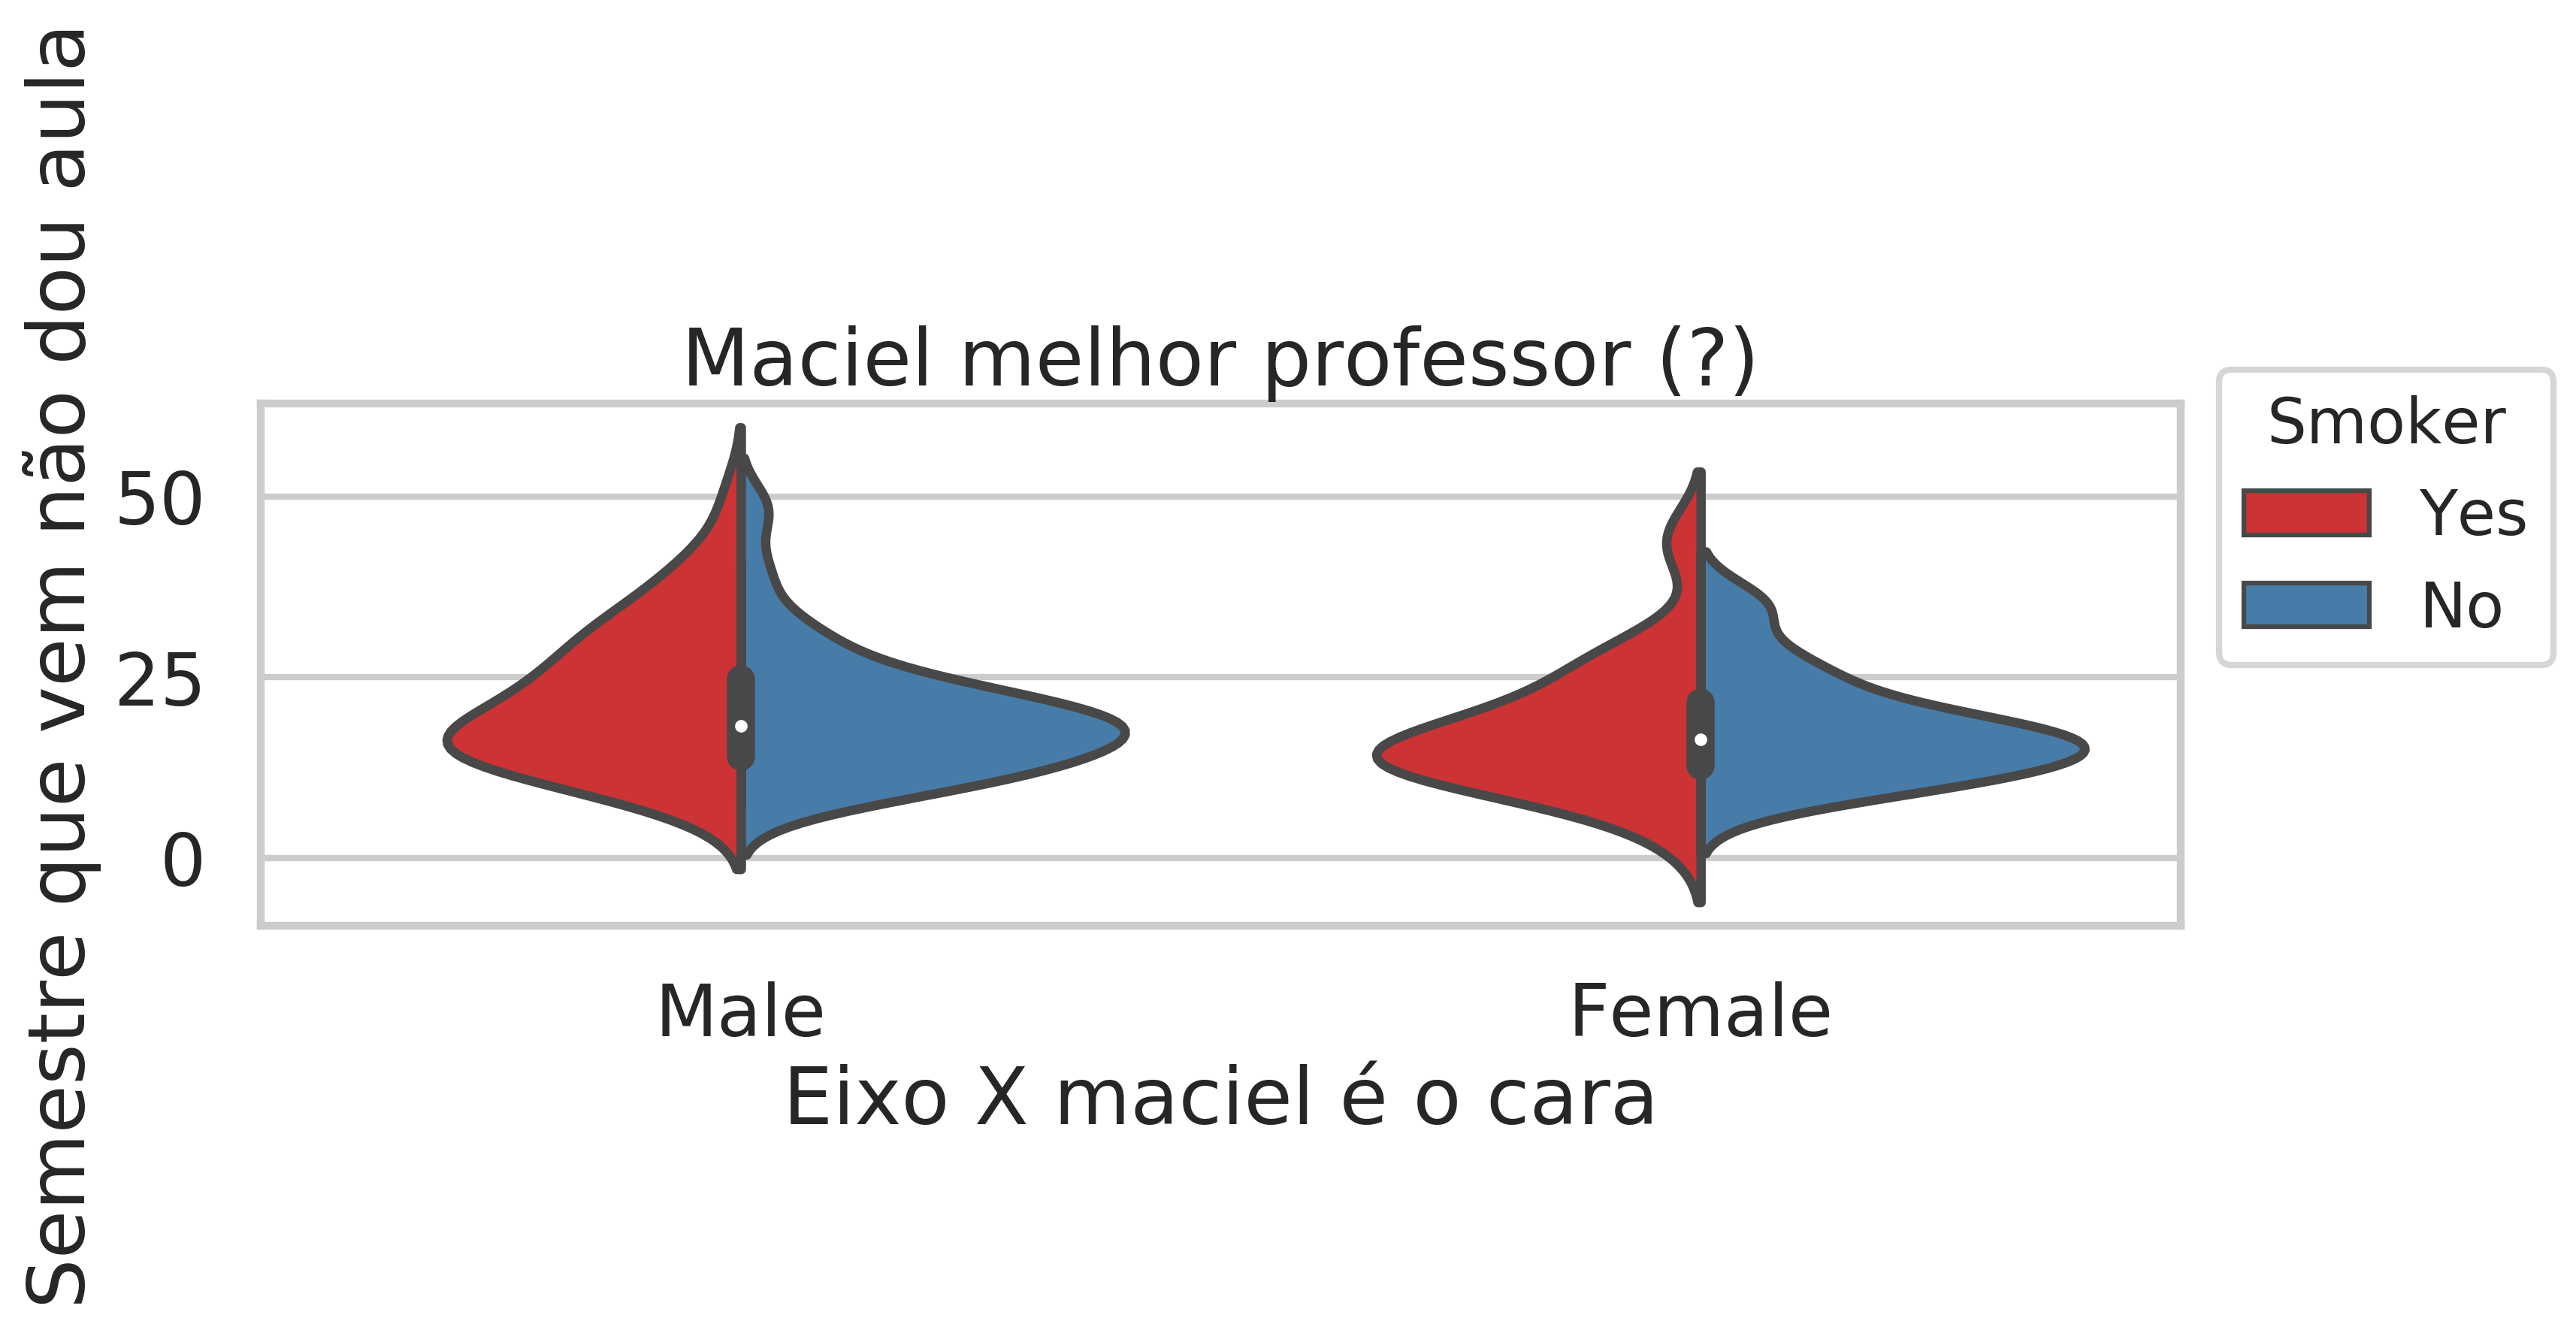

In [139]:
plt.figure(figsize=(12,5), dpi=300)

sns.set_context('poster',font_scale=1.05)

sns.set_style('whitegrid')

sns.violinplot(x='sex',y='total_bill',hue='smoker',split=True,data=tips,
              palette='Set1')

plt.legend(loc=(1.02,0.5), fontsize=20,title='Smoker', title_fontsize=20)

plt.title('Maciel melhor professor (?)')

plt.xlabel('Eixo X maciel é o cara')

plt.ylabel('Semestre que vem não dou aula')

plt.tight_layout()

plt.savefig('fernando_show.png', bbox_inches='tight')

## Regression Plots